In [7]:
import random

from PIL import ImageDraw, ImageFont, ImageFilter

from keyrover import *
from keyrover.effects import *
from keyrover.color import *

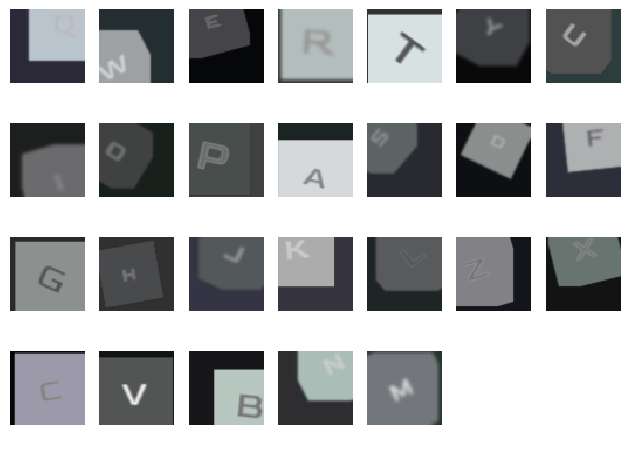

In [10]:
fonts = [ImageFont.truetype("assets/font/goldman/Goldman-Regular.ttf", size)
         for size in range(18, 28, 2)]


keys = []

for letter in "QWERTYUIOPASDFGHJKLZXCVBNM":
    foreground = random_hsv(h_lims=(0.4, 0.7), s_lims=(0.0, 0.1), v_lims=(0.2, 0.9))
    background = random_hsv(h_lims=(0.4, 0.7), s_lims=(0.0, 0.3), v_lims=(0.0, 0.3))
    text_color = random_grey(lims=(200, 255), alpha_lims=(50, 255))
    
    img = Image.new("RGBA", (64, 64), color=foreground)
    key = Image.new("RGB", (64, 64), color=background)

    draw = ImageDraw.Draw(img)
    draw.text((32, 32), letter, font=random.choice(fonts), anchor="mm", fill=text_color)

    img = apply_random_affine(img, scale_lims=(0.75, 1.5), angle_lims=(-50, 50), translation_lims=(3, 3))

    img = img_to_PIL(img)
    key.paste(img, mask=img)

    key = key.filter(ImageFilter.GaussianBlur(radius=random.uniform(0, 1.5)))

    keys.append(key)

show_images(keys)

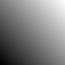

In [9]:
gradient_image((64, 64), [(0, 0, 0), (255, 255, 255)], 43)